In [1]:
import pandas as pd
import numpy as np


In [2]:
churn_df = pd.read_csv('./data/bank.data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# check the unique value for each volumn
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
# get your target value
y = churn_df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

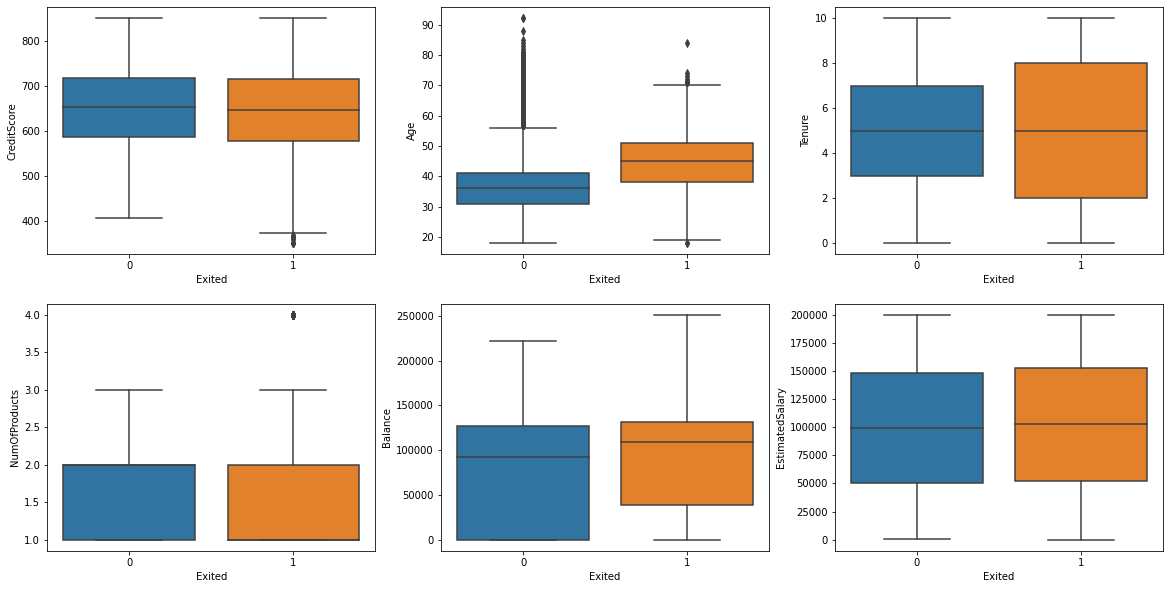

In [10]:
_,axss = plt.subplots(2,3,figsize=[20,10])
sns.boxplot(x='Exited',y='CreditScore',data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited',y='Age',data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited',y='Tenure',data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited',y='NumOfProducts',data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited',y='Balance',data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited',y='EstimatedSalary',data=churn_df, ax=axss[1][2])

<AxesSubplot:xlabel='Exited', ylabel='count'>

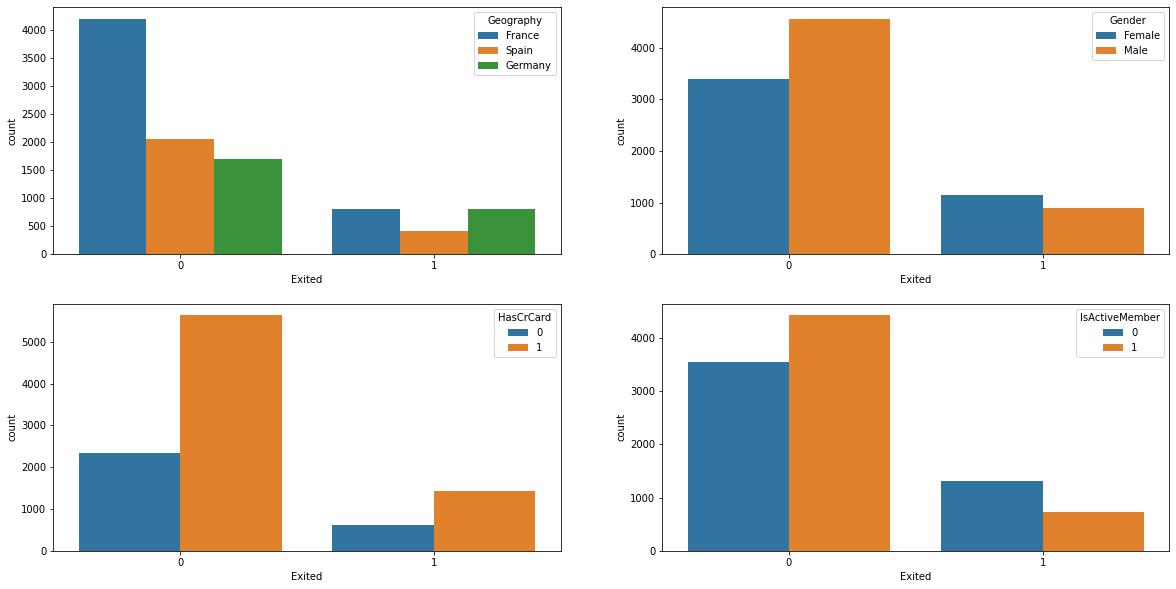

In [11]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited',hue='Geography',data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited',hue='Gender',data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited',hue='HasCrCard',data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited',hue='IsActiveMember',data=churn_df, ax=axss[1][1])

<AxesSubplot:>

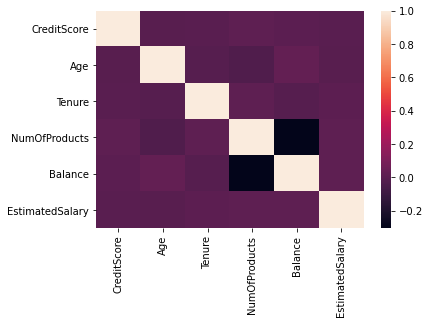

In [12]:
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(corr_score)

In [13]:
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


In [14]:
to_drop=['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [16]:
cat_cols = X.columns[X.dtypes=='O']
num_cols = X.columns[(X.dtypes=='float64')|(X.dtypes=='int')]

In [17]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [18]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [19]:
# split data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, stratify=y,random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [21]:
# one hot encoding
# another way is get_dummies

In [22]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncoding(df,enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[['Geography']])

X_train = oneHotEncoding(X_train,enc_ohe,categories)
X_test = oneHotEncoding(X_test,enc_ohe,categories)

In [23]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [24]:
X.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [25]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [26]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [27]:
# standardization
# normalization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train[num_cols])
X_train[num_cols] = scalar.fit_transform(X_train[num_cols])
X_test[num_cols] = scalar.fit_transform(X_test[num_cols])

In [28]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [31]:
classifier_logistic.fit(X_train,y_train)

LogisticRegression()

In [32]:
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
classifier_logistic.score(X_test,y_test)

0.8076

In [35]:
from sklearn import model_selection

# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.84133333 0.84066667 0.83       0.83066667 0.84      ]
Model accuracy of KNN is 0.8365333333333334
[0.87933333 0.862      0.86       0.85733333 0.862     ]
Model accuracy of Random Forest is 0.8641333333333334


In [37]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [40]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.1)('l1', 1) ('l1', 5) ('l1', 10)('l1', 100)
# ('12', 0.1)('l2', 1) ('l2', 5) ('l2', 10)('l2', 100)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10,100)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 1, 5, 10, 100), 'penalty': ('l1', 'l2')})

In [41]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [43]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [44]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
best_LR_model.score(X_test,y_test)

0.8084

In [46]:
parameters = {'n_neighbors':[1,3,5,7,9]}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters,cv = 5)
Grid_KNN.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [47]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [48]:
best_KNN_model = Grid_KNN.best_estimator_

In [50]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
best_KNN_model.score(X_test,y_test)

0.8452

In [ ]:
# 

In [53]:
parameters = {'n_estimators':[60,80,100],'max_depth':[1,5,10]}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [54]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8653333333333334
Best parameters set:
max_depth:10
n_estimators:60


In [55]:
best_RF_model = Grid_RF.best_estimator_

In [56]:
best_RF_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
best_RF_model.score(X_test,y_test)

0.8612

In [ ]:
# Model Evalution
# Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)
# class of interest as positive
# TP: correctly labeled real churn
# Precision(PPV, positive predictive value): tp / (tp + fp); Total number of true predictive churn divided by the total number of predictive churn; High Precision means low fp, not many return users were predicted as churn users.
# Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn) Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [66]:
# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy = (tp + tn)/(tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print('Accuracy is: ' + str(accuracy))
    print('precision is: ' + str(precision))
    print('recall is: ' + str(recall))
    print()

# print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_name = ['Not',"Churn"]
    for cm in confusion_matrixs:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [68]:
confusion_matrixs = [
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]
draw_confusion_matrices(confusion_matrixs)

Random Forest
Accuracy is: 0.8612
precision is: 0.8045112781954887
recall is: 0.4204322200392927

Logistic Regression
Accuracy is: 0.8084
precision is: 0.5833333333333334
recall is: 0.206286836935167

K nearest neighbor
Accuracy is: 0.8452
precision is: 0.7310606060606061
recall is: 0.3791748526522593



In [71]:
classification_report(y_test,  best_LR_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89      1991\n           1       0.58      0.21      0.30       509\n\n    accuracy                           0.81      2500\n   macro avg       0.70      0.58      0.60      2500\nweighted avg       0.78      0.81      0.77      2500\n'

In [ ]:

classification_report(y_test,  best_LR_model.predict(X_test))
'              precision    recall  f1-score   support\n\n           
0       0.83      0.96      0.89      1991\n           
1       0.58      0.21      0.30       509\n\n    

accuracy                           0.81      2500\n   
macro avg       0.70      0.58      0.60      2500\n
weighted avg       0.78      0.81      0.77      2500\n'

In [73]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [76]:
y_pred_rf = best_RF_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [77]:
best_RF_model.predict_proba(X_test)

array([[0.69515853, 0.30484147],
       [0.93479089, 0.06520911],
       [0.7654298 , 0.2345702 ],
       ...,
       [0.84382038, 0.15617962],
       [0.94603237, 0.05396763],
       [0.89062395, 0.10937605]])

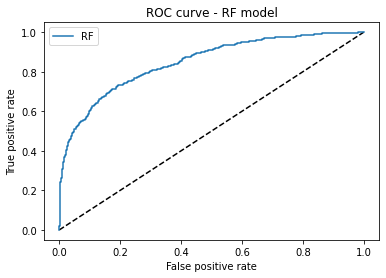

In [78]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label = 'RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

<AxesSubplot:>

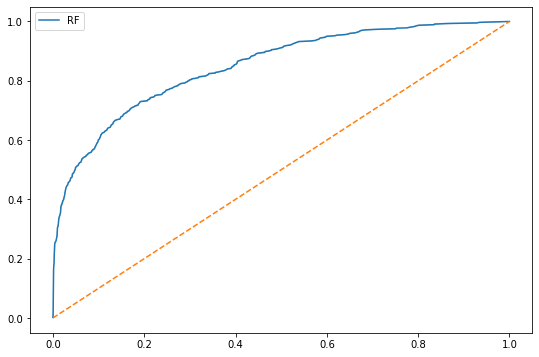

In [86]:
_,axss = plt.subplots(1,1,figsize=[9,6])
sns.lineplot(fpr_rf,tpr_rf, label = 'RF')
sns.lineplot([0,1],[0,1],linestyle='--')

In [87]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8483243357387221

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncoding(df,enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[['Geography']])

X_train = oneHotEncoding(X_train,enc_ohe,categories)
X_test = oneHotEncoding(X_test,enc_ohe,categories)

In [91]:
X_with_corr = X.copy()
X_with_corr = oneHotEncoding(X_with_corr, OneHotEncoder(),['Geography'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [96]:
OneHotEncoder().fit_transform(X[['Geography']]).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])